# Classification

***Definition:***
- In Classification methods, we are trying to find a relationship between a bunch of qualitative or quantitative variables to some qualitative variables.
- Qualitative variables take in an unordered set $C$, such as 

    $\text{eye color}\in \{\text{brown,blue,green}\}$

    $\text{email}\in \{\text{spam,ham}\}$
- Given a feature vector $X$ and a qualitative response $Y$ taking values in set $C$, the classification take is to build a function $C(X)$ that takes input feature vector $X$ and predicts its value for $Y$;i.e, $C(X)\in C$.
- Often we are more intrested in estimating the probabilities that $X$ belong to each category in $C$.

In [0]:
 import numpy as np
 import pandas as pd
 
 import matplotlib.pyplot as plt
 from matplotlib import style
 import seaborn as sns
 import matplotlib as mpl

 style.use('fivethirtyeight')
 %matplotlib inline

In [0]:
credit = pd.read_excel('/content/drive/My Drive/Repos/Git/Statistics-Basics/An Introduction to Statistical Learning/Dataset/Default.xlsx')

In [0]:
credit.head(3)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947


In [0]:
credit.drop('Unnamed: 0',1,inplace=True)

In [0]:
default = credit[credit.default == 'Yes']
default_no = credit[credit.default == 'No']

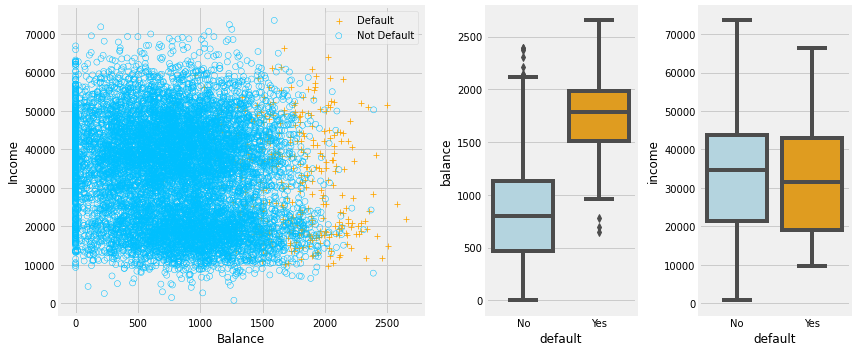

In [0]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1,4)
ax1 = plt.subplot(gs[0,:2])
ax2 = plt.subplot(gs[0,2])
ax3 = plt.subplot(gs[0,3])

# Scatterplot
ax1.scatter(x=default.balance,y=default.income,marker='+',linewidth=0.8,label='Default',color='orange')
ax1.scatter(x=default_no.balance,y=default_no.income,facecolor='None',edgecolor='deepskyblue',label='Not Default')
ax1.legend(loc='best')
ax1.set_xlabel('Balance')
ax1.set_ylabel('Income')

# Box plot
c_palette = {'No':'lightblue','Yes':'orange'}
sns.boxplot('default','balance',data=credit,orient='v',ax=ax2,palette=c_palette)
sns.boxplot('default','income',data=credit,orient='v',ax=ax3,palette=c_palette)
gs.tight_layout(plt.gcf())

plt.show()

## Can we use Linear Regression?

- Suppose for the Default Classification task that we code,

  $Y = \begin{cases}
  0, &\text{if No}\\
  1, &\text{if Yes}
  \end{cases}$

  We can simply perform a linear regression of $Y$ on $X$ and classify as Yes if $\hat Y > 0.5?$

- In this case of binary outcome, linear regression does a good job as a classfier, and is equivalent to linear discriminant analysis which we will discuss later.
- Since the population $E(Y|X = x) = Pr(Y = 1|X = x)$, we might think that regression is perfect for this task.

In [0]:
credit['default2'] = credit.default.factorize()[0]
credit['student2'] = credit.student.factorize()[0]
credit.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


In [0]:
X_train = credit.balance.values.reshape(-1,1)
y = credit.default2

In [0]:
X_test = np.arange(credit.balance.min(),credit.balance.max()).reshape(-1,1)

In [0]:
import sklearn.linear_model as sk_lm

In [0]:
clf = sk_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
prob = clf.predict_proba(X_test)

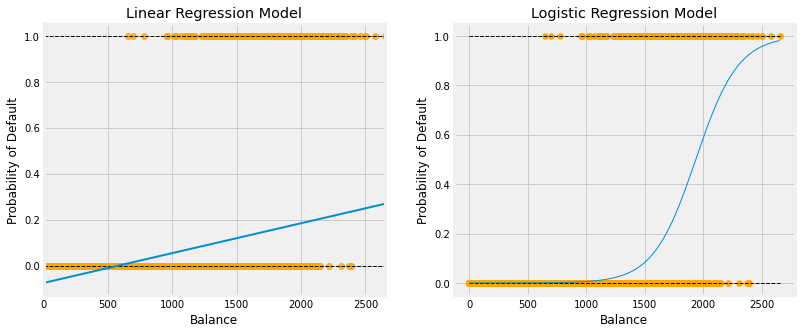

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

# Linear Regression plot
sns.regplot(credit.balance,credit.default2,order=1,ci=None,scatter_kws={'color':'orange'},line_kws={'lw':2},ax=ax1)
ax1.set_title('Linear Regression Model')
ax1.hlines(0,xmin=0,xmax=credit.balance.max(),linestyles='dashed',lw=1)
ax1.hlines(1,xmin=0,xmax=credit.balance.max(),linestyles='dashed',lw=1)
ax1.set_xlabel('Balance')
ax1.set_ylabel('Probability of Default')

# Logistic Regression plot
ax2.set_title('Logistic Regression Model')
ax2.scatter(x=X_train,y=y,c='orange')
ax2.plot(X_test,prob[:,1],lw=1)
ax2.set_xlabel('Balance')
ax2.set_ylabel('Probability of Default')
ax2.hlines(y=0,xmin=X_train.min(),xmax=X_train.max(),linestyles='dashed',lw=1)
ax2.hlines(y=1,xmin=X_train.min(),xmax=X_train.max(),linestyles='dashed',lw=1)

plt.show()

**Observation:**
- From the above plots we can observe from the linear model that when the balance is below 500, the default goes negative. This is not a good indicator.
- Even for the maximum balance the probability of default is less than 0.4.
- However the logistic regression does a much better job compared to linear regression since, logistic regression is not a linear model.
-  The orange mark indicates the respose $Y$, either 0 or 1. Linear Regression doesn't estimate $Pr(Y=1|X)$ properly.
- Logistic Regression is more suited to this type of model.

## Linear Regression Continued

- Now suppose we have a response variable with three possible values. A Patient present at the emergency room, and we must classify them accoriding to their symptomps.

  $\begin{cases}
  1,&\text{if Stroke}\\
  2,&\text{if drug overdose}\\
  3,&\text{if epiliptic seizure}
  \end{cases}$
- This coding suggest an ordering, and infact implies that the difference between stroke and drug overdose is the same as between drug overdose and epiliptic seizure.

# Logistic Regression

- Let's write $p(X) = Pr(Y=1|X)$ for short and considering using balance to predict default. Logistic Regression uses the form

  $p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$

  $(e\approx 2.71828$ is a mathematical constant[Euler's Number]). It is easy to see that no matter what values $\beta_0,\beta_1 \text{or} X$ take, $p(X)$ will have values between 0 and 1. 

- Logistic Regression sample model

  $l(X_1,X_2,X_3) = \frac{e^{\beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_3}}{1+e^{\beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_3}}$

  and $0<l<1$ where $l = P(X_1,X_2,X_3)$.

- When $l(X_1,X_2,X_3) = \begin{cases}
<0.5 \rightarrow \text{assign to 0}\\
>0.5 \rightarrow \text{assign to 1}
\end{cases}$

- A bit of rearrangement gives,

  $\log(\frac{p(X)}{1-p(X)}) = \beta_0+\beta_1X$.

- This monotone transformation is called the log odd or logit transformation of $p(X)$.
- $\frac{p(X)}{1-p(X)}$ is called odds.
- Logistic Regression ensures that our estimate for $p(X)$ lies between 0 and 1.

### Maximum Likelihood

- We use the maximum likelihood to estimate our parameters.

  $l(\beta_0,\beta_1) = \underset{i:y_i=1}{\Pi}p(x_i)\underset{i:y_i=0}{\Pi}(1-p(X))$.
- This likelihood give the probability of the observed zeros and ones in the data. We pick $\beta_0\text{and}\beta_1$ to maximize the likelihood of the observed data.

### Logistic Regression with a single variable.

In [0]:
import statsmodels.formula.api as smf

In [98]:
model = smf.logit('default2~balance',data=credit).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               default2   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Apr 2020   Pseudo R-squ.:                  0.4534
Time:                        05:18:07   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0

In [99]:
print(clf.intercept_,clf.coef_)

[-10.65132784] [[0.00549892]]


***Difference between GLM and Logit***
- Logit is a transformation. We use logit to transform our model into a linear model.
- Logistic Regression (GLM)  is a regression model when you have a response variable as a binary variable.

**How to interpret logistic regression coefficients?**

 $l(X_1,X_2) = \frac{e^{\beta_0+\beta_1X_1+\beta_2X_2}}{1+e^{\beta_0+\beta_1X_1+\beta_2X_2}}$

- Lets assume that $\beta_1=1\text{ and }\beta_2 = 0.5$.
- $(e^{\beta_1}-1) \rightarrow (e^1-1) \rightarrow 2.71-1 = 1.71$
- This means that the change in the odds for a unit change in X_1 is 171%.

- From the observation summary. that coef of balance is 0.0055
- $e^{0.0055}-1 = 0.0055$
- A dollar change in the value of balance will result in 0.55 change in the odds of default.


**Making Predictions**

- What is our estimated probability of default for someone with a balance of $1000?

  $\hat p(X) = \frac{e^{\hat\beta_0}+\hat\beta_1X_1}{1+e^{\hat\beta_0}+\hat\beta_1X_1} = \frac{e^{-10.6513+0.0055\times1000}}{1+e^{-10.6513+0.0055\times1000}} = 0.006$

- The odd of default are 0.6%

**With balance of $2000?**


  $\hat p(X) = 0.586$

- The odds of default is 58.6%

***Changing the predictor from Balance to Student***

In [0]:
clf = sk_lm.LogisticRegression(solver='newton-cg')

In [0]:
X_train = credit.student2.values.reshape(-1,1)

In [0]:
clf = clf.fit(X_train,y)

In [106]:
print(f'Intercept:{clf.intercept_}\nCoeff:{clf.coef_}')

Intercept:[-3.50213151]
Coeff:[[0.39959759]]


In [109]:
model = smf.logit('default2~C(student)',data = credit).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               default2   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Apr 2020   Pseudo R-squ.:                0.004097
Time:                        05:46:53   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.5041      0.071    -49.554      0.000      -3.643      -3.366
C(studen

$e^{0.4049}-1 = 0.499$

- This means that the student has an average of 49.9% chance to default.

$\hat Pr(\text{default}=\text{yes}|\text{student}=\text{yes}) = \frac{e^{-3.5041+0.4049*1}}{1+e^{-3.5041+0.4049*1}} = 0.0431$ 

$\hat Pr(\text{default}=\text{yes}|\text{student}=\text{no}) = \frac{e^{-3.5041+0.4049*0}}{1+e^{-3.5041+0.4049*0}} = 0.0292$ 

### Logistic Regression with several Variables.

In [0]:
X_train = credit[['student2','income','balance']].values.reshape(-1,3)

In [114]:
clf = sk_lm.LogisticRegression(solver='newton-cg').fit(X_train,y)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [115]:
print(f'Intercept:{clf.intercept_}\n Coefficients:{clf.coef_}')

Intercept:[-10.77081718]
 Coefficients:[[-6.45992211e-01  2.41860658e-06  5.68910702e-03]]


In [121]:
model = smf.logit('default2~balance+income+student',data=credit).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               default2   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 28 Apr 2020   Pseudo R-squ.:                  0.4619
Time:                        06:01:34   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student[T.Yes]  

***Why is the coeffiecient of student negative, when it was positive before?***
- $e^{-0.6768}-1 = -0.47$
- For a constant balance, 47% of student are expected to default less than non-students.


**Observation**
- income is not a significant predictor.

**Confounding**

In [0]:
clf = sk_lm.LogisticRegression(solver='newton-cg')
clf2 = sk_lm.LogisticRegression(solver='newton-cg')

In [0]:
X_train = credit[credit.student2==0]['balance'].values.reshape(len(credit[credit.student2==0]['balance']),1)
X_train_2 = credit[credit.student2==1]['balance'].values.reshape(len(credit[credit.student2==1]['balance']),1)
y_train = credit[credit.student2==0]['default2']
y_train_2 = credit[credit.student2==1]['default2']

In [0]:
clf = clf.fit(X_train,y_train)
clf2 = clf2.fit(X_train_2,y_train_2)

In [0]:
X_test = np.arange(credit.balance.min(),credit.balance.max()).reshape(-1,1)

In [0]:
prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

In [157]:
credit.groupby(['student','default']).size().unstack('student')

student,No,Yes
default,,
No,6850,2817
Yes,206,127


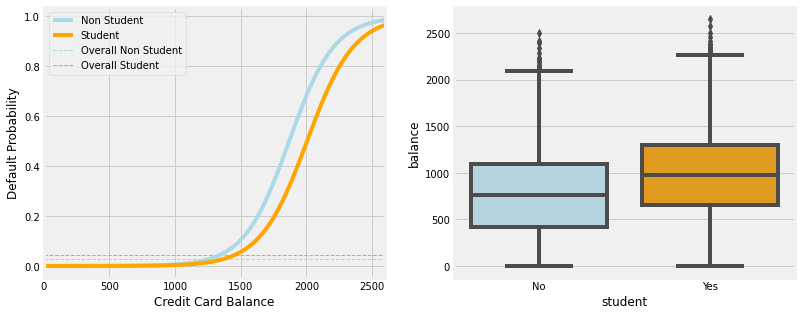

In [165]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

# Default Rate of Student vs Non Students
ax1.plot(X_test,pd.DataFrame(prob)[1],color='lightblue',label='Non Student')
ax1.plot(X_test,pd.DataFrame(prob2)[1],color='orange',label='Student')
ax1.hlines(y=206/7056,xmin=0,xmax=X_test.max(),label='Overall Non Student',color='lightblue',linestyles='dashed',lw=1)
ax1.hlines(y=127/2944,label='Overall Student',xmin=0,xmax=X_test.max(),color='orange',linestyles='dashed',lw=1)
ax1.set_xlabel('Credit Card Balance')
ax1.set_ylabel('Default Probability')
ax1.set_xlim(0,2600)
ax1.legend(loc='best')

# Card Balance comapring student vs non students
sns.boxplot('student','balance',data=credit,orient='v',palette=c_palette,ax=ax2)

plt.show()

**Observation:**
- From the above plots, we can observe that the students tend to have higher balances than non-students.
- The default rate of students is lower than that of non students, when the balance is the same.
- For each level of balance, student default less than non students.

### South African Heart Disease

- 160 cases of myocardial infection and 302 controls(all males in the age range 15-64),from Western Cape, South Africa in early 80's.
- Overall prevelance very high in this region: 5.1%
- Measurement on seven predictors(risk factors), shown in scatterplot matrix.
- Goal is to identify relative strength and risk factors.
- This was a part of intervention studies aimed at educating the public on healthier diets.

In [176]:
heart = pd.read_csv('/content/drive/My Drive/Repos/Git/Statistics-Basics/An Introduction to Statistical Learning/Dataset/SAheart.data')
heart.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [0]:
heart.drop('row.names',1,inplace=True)

In [178]:
heart.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [0]:
heart['famhist'].replace({'Present':1,'Absent':0},inplace=True)

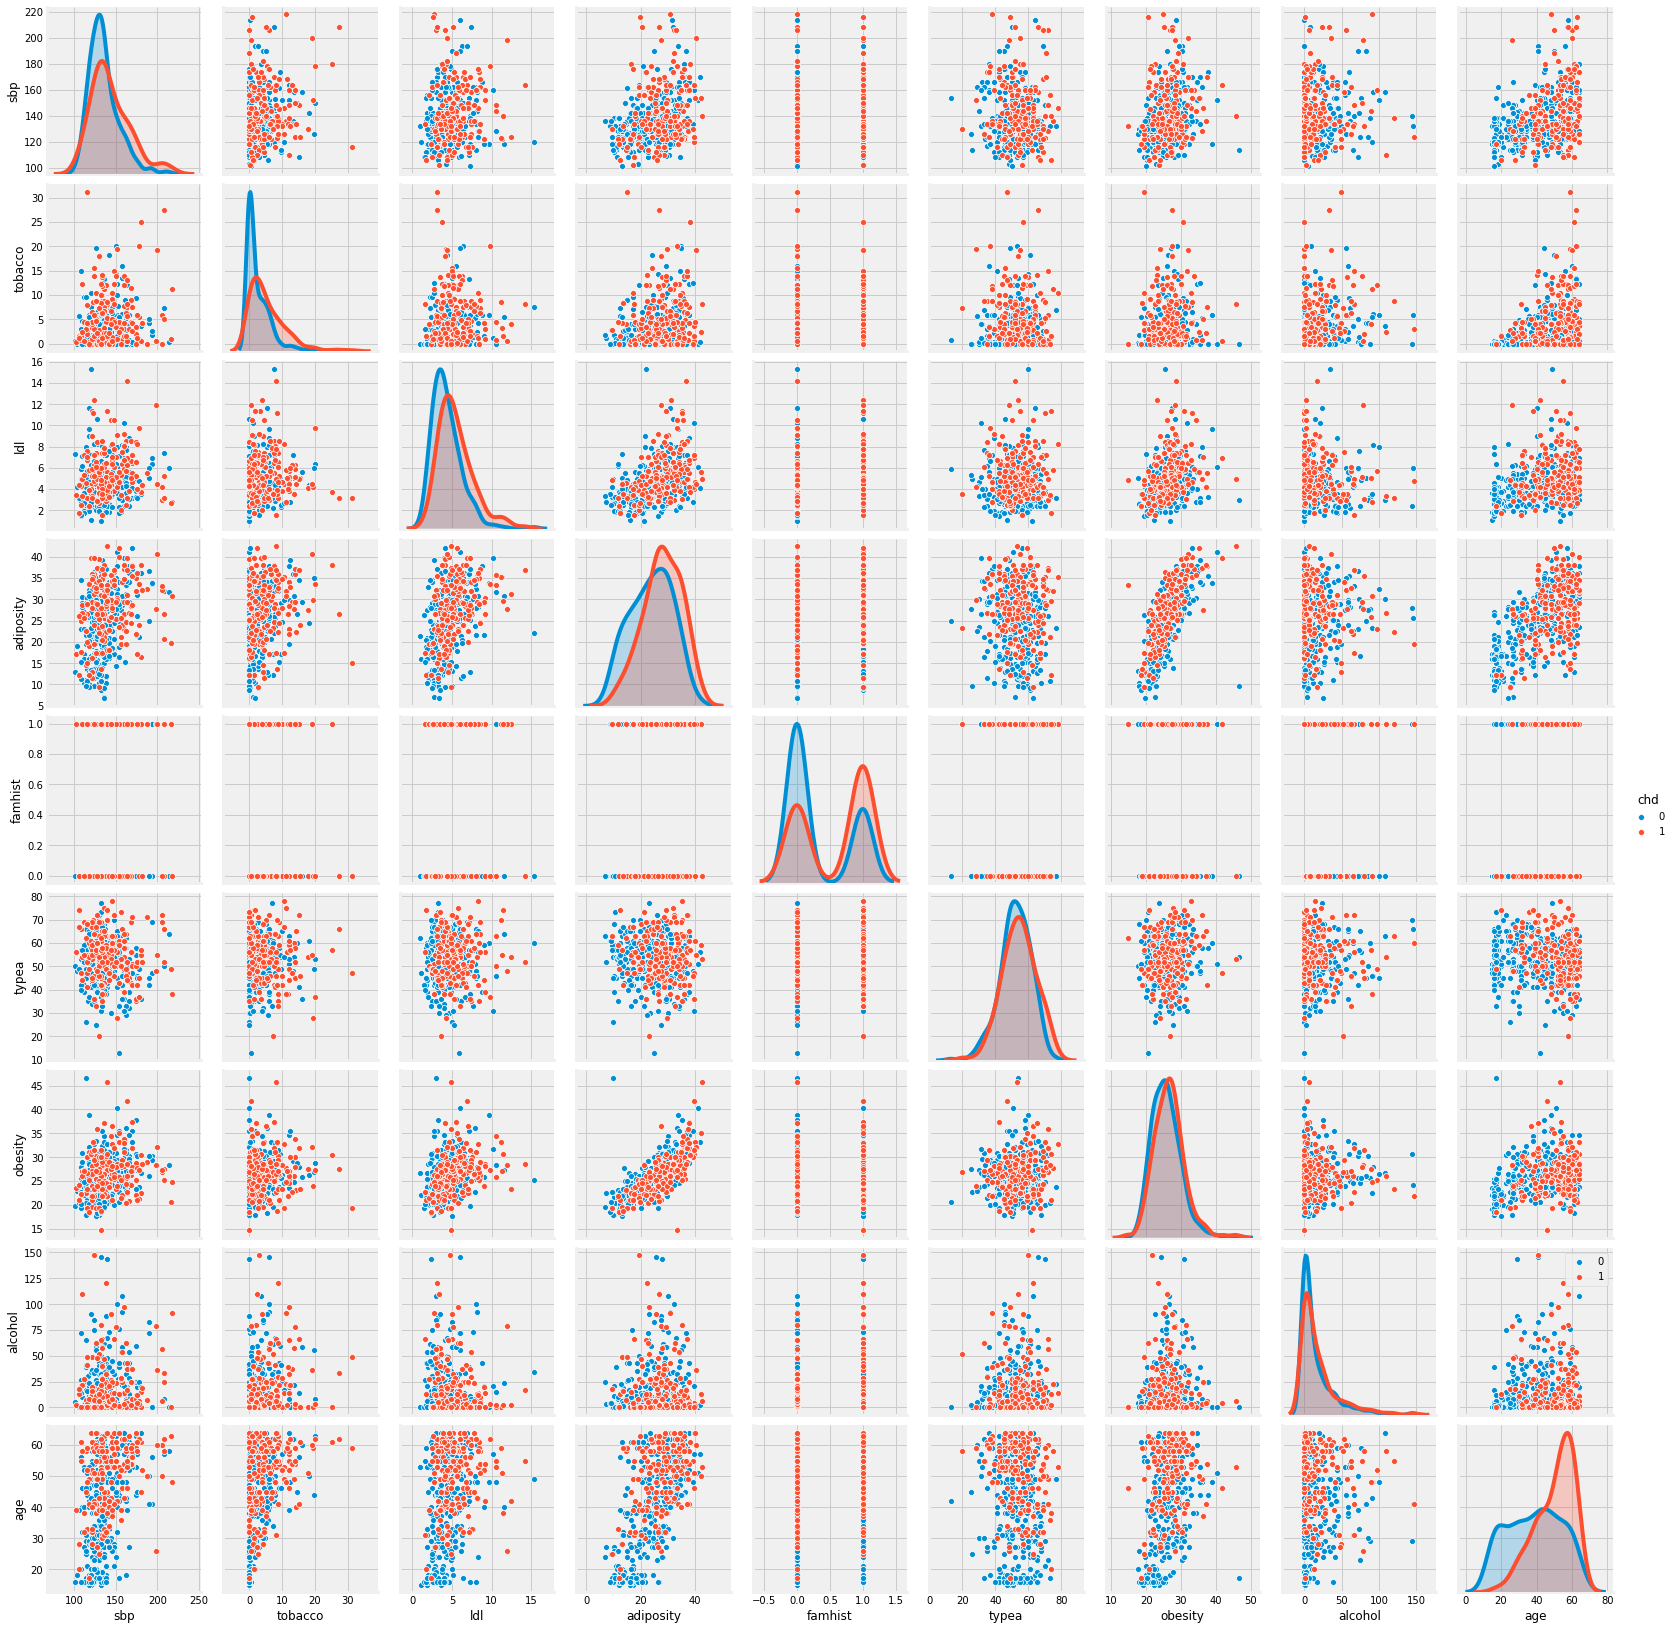

In [184]:
sns.pairplot(heart,hue='chd')
plt.legend(loc='best')
plt.show()

In [0]:
clf = sk_lm.LogisticRegression(solver='newton-cg')

In [0]:
X_train = heart.drop(['chd','typea','adiposity'],1)
y_train = heart['chd']

In [0]:
model = clf.fit(X_train,y_train)

In [218]:
print(f'Intercept:{model.intercept_}')
pd.DataFrame(data=model.coef_.reshape(7,1),index=heart.columns.difference(['adiposity','typea','chd'],sort=False),columns=['Coeffecient'])

Intercept:[-4.11636656]


,Coeffecient
sbp,0.005700
tobacco,0.079061
ldl,0.184673
famhist,0.894129
obesity,-0.034116
alcohol,0.000665
age,0.042716


In [206]:
heart_model = smf.logit('chd~'+'+'.join(heart.columns.difference(['chd'])),data=heart,drop_cols=['adiposity','typea']).fit()
print(heart_model.summary2())

Optimization terminated successfully.
         Current function value: 0.522916
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.189     
Dependent Variable: chd              AIC:              499.1740  
Date:               2020-04-28 07:37 BIC:              532.2586  
No. Observations:   462              Log-Likelihood:   -241.59   
Df Model:           7                LL-Null:          -298.05   
Df Residuals:       454              LLR p-value:      2.2586e-21
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -4.1296    0.9642  -4.2830  0.0000  -6.0194  -2.2398
age            0.0425    0.0102   4.1808  0.0000   0.0226   0.

**Observation**